In [157]:
import pandas as pd
from plotnine import *

Below we use two insurance datasets to predict insurance charges based on multiple variables. We see various methods of variable selection (including interaction polynomial features) as well as the performance of prediction models on datasets with different relationships between variables.

Note: Pipelines, cross-validation, and Tuning are not present in this notebook/project. For those topics see the "Variable Selection & Regulation" project on Github.

## Data Exploration

In [158]:
insurance = pd.read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Computing_ML\Labs\Lab_5\insurance_costs_1.csv")

In [159]:
#Dummify sex and smoker variables
insurance["sex"] = pd.get_dummies(insurance["sex"],drop_first=True)
insurance["smoker"] = pd.get_dummies(insurance["smoker"],drop_first=True)
#Convert them to categorical variables
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['sex'] = insurance['sex'].astype('category')
insurance.head(2)

,age,sex,bmi,smoker,region,charges
0,19,0,27.900,1,southwest,16884.92400
1,33,1,22.705,0,northwest,21984.47061


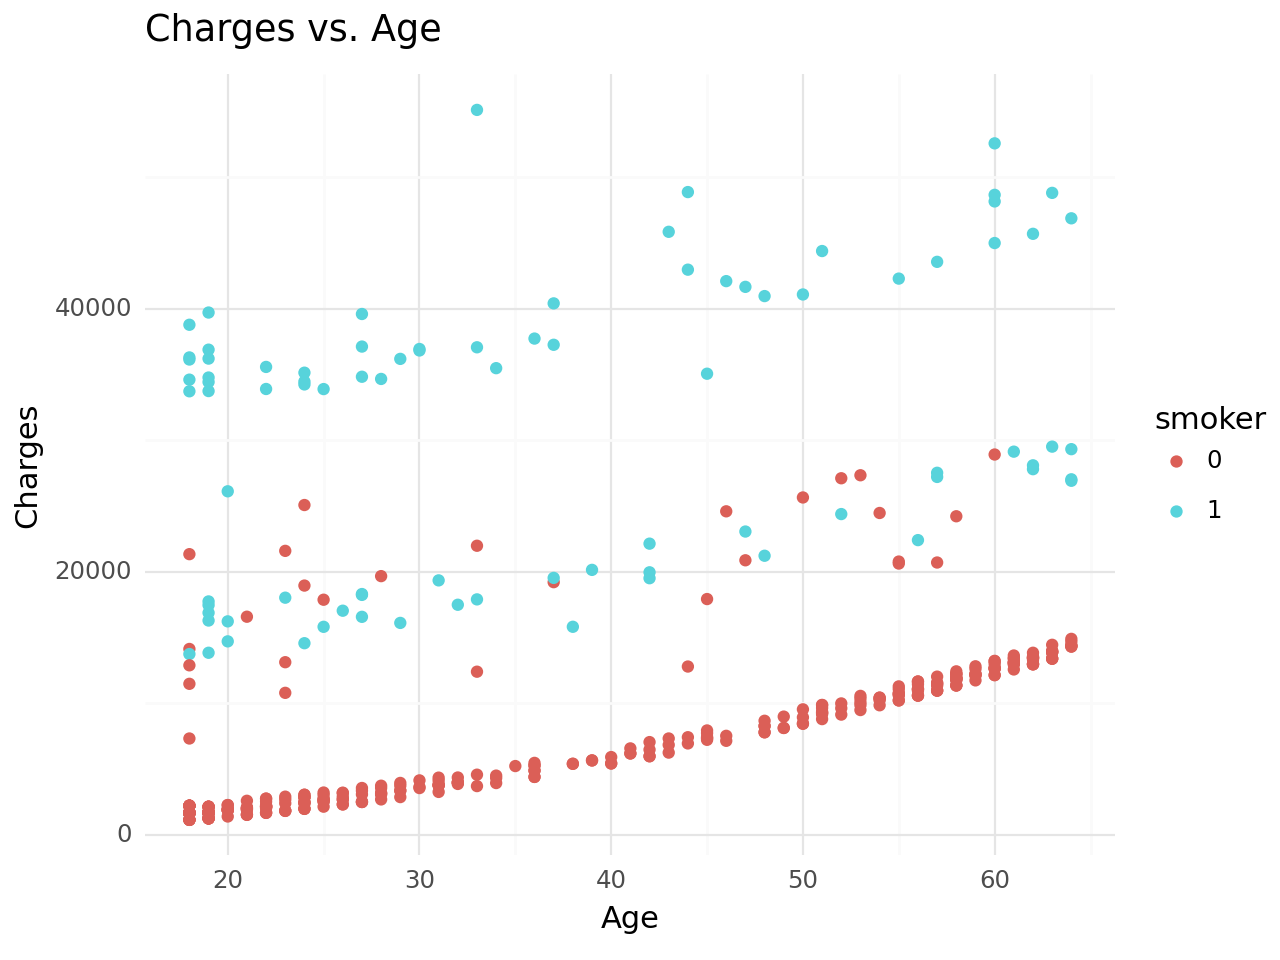

In [160]:
#Charges vs. Age
plot1 = (
    ggplot(insurance, aes(x='age', y='charges'))
    + geom_point(aes(color='smoker'))
    + labs(title="Charges vs. Age", x="Age", y="Charges")
    + theme_minimal()
)
print(plot1)

The graph shows there is a  positivly correlated relationship between charges and age, as the age of an individual increases the charges seem to increase, but it looks that whether an individual is a smoker might have an even greater correlation/influence.

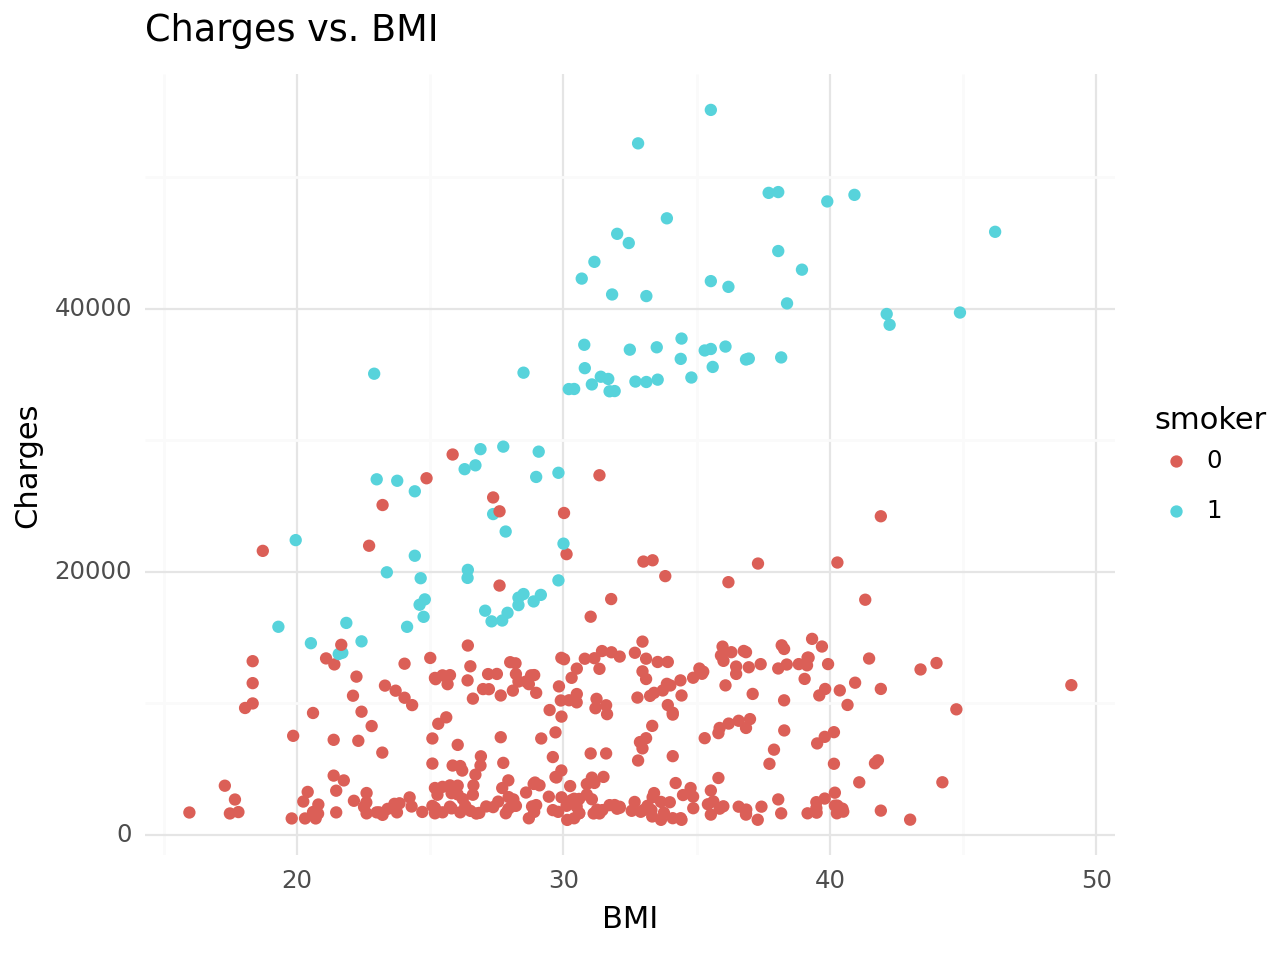

In [161]:
#Charges vs. BMI
plot2 = (
    ggplot(insurance, aes(x='bmi', y='charges'))
    + geom_point(aes(color='smoker'))
    + labs(title="Charges vs. BMI", x="BMI", y="Charges")
    + theme_minimal()
)
print(plot2)

It appears that the relationship between charges and BMI might differ based on whether the individual is a smoker, as non-smokers don't seem to have a significant correlation but there appears to be a strong relationship between BMI and charges for smokers.

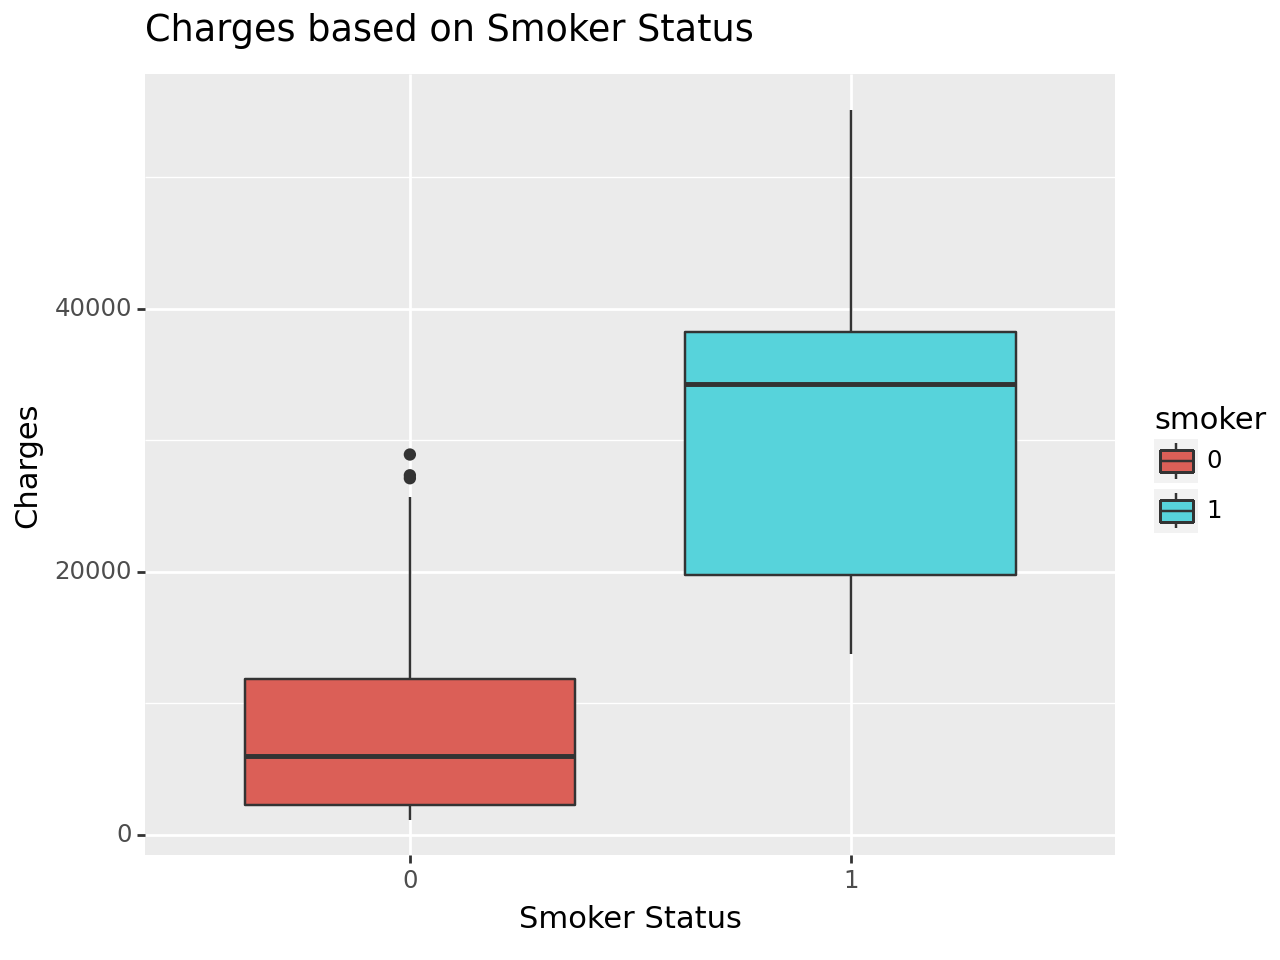

In [162]:
# Charges based on Smoker Status
plot3 = (
    ggplot(insurance, aes(x='smoker', y='charges', fill='smoker')) 
    + geom_boxplot() 
    + labs(title="Charges based on Smoker Status", x="Smoker Status", y="Charges")
)

print(plot3)

This graph of charges based on smoker status confirm that whether an indiviual is a smoker has a strong relationship with charges. Smokers have greater charges than non-smokers with makes sense intuitively.

## Simple Linear Models

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr = LinearRegression()

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [164]:
#Construct Model
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model1 = lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred),
r2 = round(r2_score(y_test, y_pred),4)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

betaage = round(model1.coef_[0],4)
intercept = round(model1.intercept_,4)

print(f"Intercept (base charge when age is 0): {intercept}")
print(f"Age coefficient (change in charge for a year increase in age): {betaage}")

Mean Squared Error (MSE): (115692858.2215429,)
R^2 Score: 0.1097
Intercept (base charge when age is 0): 4777.3554
Age coefficient (change in charge for a year increase in age): 210.2125


With a low R^2 score of 0.1097, this model does not fit the data well and would not be ideal for prediction.

2. Make a model that also incorporates the variable sex. Report your results.

In [165]:
#Construct Model w/ sex
X = insurance[["age","sex"]]
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model2 = lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred),
r2 = round(r2_score(y_test, y_pred),4)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

betaage = round(model2.coef_[0],4)
betasex = round(model2.coef_[1],4)
intercept = round(model2.intercept_,4)

print(f"Intercept (base charge when age is 0): {intercept}")
print(f"Age coefficient (change in charge for a year increase in age): {betaage}")
print(f"Sex coefficient (change in charge based on sex): {betasex}")

Mean Squared Error (MSE): (115625475.36522326,)
R^2 Score: 0.1102
Intercept (base charge when age is 0): 4391.0731
Age coefficient (change in charge for a year increase in age): 208.9231
Sex coefficient (change in charge based on sex): 821.0522


This model performed slightly better than the previous simplemodel with a R^2 value of 0.1102, but that value is still low. Also, based on the simplemodel2, being a male increases the charge/cost by $821.05.

Now make a model that does not include sex, but does include smoker. Report your results.

In [166]:
#Construct Model w/ smoker instead of sex
X = insurance[["age","smoker"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model3 = lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred),
r2 = round(r2_score(y_test, y_pred),4)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

betaage = round(model3.coef_[0],4)
betasmoker = round(model3.coef_[1],4)
intercept = round(model3.intercept_,4)

print(f"Intercept (base charge when age is 0): {intercept}")
print(f"Age coefficient (change in charge for a year increase in age): {betaage}")
print(f"Smoker coefficient (change in charge based on if somebody smokes): {betasmoker}")

Mean Squared Error (MSE): (27926233.98768064,)
R^2 Score: 0.7851
Intercept (base charge when age is 0): -1836.2287
Age coefficient (change in charge for a year increase in age): 246.9786
Smoker coefficient (change in charge based on if somebody smokes): 23940.4555


Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

Model 3 better fits the data, as it has a much higher R^2 value of 0.7851 and a much lower MSE at 27926233.99. Smoking seems to be an important variable when predicting charges.

## Multiple Linear Models

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?



In [167]:
#Construct Model w/ bmi and age
X = insurance[["age","bmi"]]
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model4 = lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred),
r2 = round(r2_score(y_test, y_pred),4)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

betaage = round(model4.coef_[0],4)
betaBMI = round(model4.coef_[1],4)
intercept = round(model4.intercept_,4)

print(f"Intercept (base charge when age is 0): {intercept}")
print(f"Age coefficient (change in charge for a year increase in age): {betaage}")
print(f"BMI coefficient (change in charge based on unit increase in BMI): {betaBMI}")

Mean Squared Error (MSE): (113576079.96618074,)
R^2 Score: 0.126
Intercept (base charge when age is 0): -4210.8037
Age coefficient (change in charge for a year increase in age): 193.5845
BMI coefficient (change in charge based on unit increase in BMI): 312.6385


Model 4 (Age and BMI) has a higher R^2 value (0.126) and lower MSE (113576079) than Model 1. Therefore it would be a better model for predicting.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [168]:
#Create Age^2 
insurance["agesq"] = insurance["age"]**2

#Construct Model w/ age and age^2
X = insurance[["age","agesq"]]
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

modelAgeSq = lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred),
r2 = round(r2_score(y_test, y_pred),4)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

betaage = round(modelAgeSq.coef_[0],4)
betaagesq = round(modelAgeSq.coef_[1],4)
intercept = round(modelAgeSq.intercept_,4)

print(f"Intercept (base charge when age is 0): {intercept}")
print(f"Age coefficient (change in charge for a year increase in age): {betaage}")
print(f"Age^2 coefficient: {betaagesq}")

Mean Squared Error (MSE): (116395338.81214127,)
R^2 Score: 0.1043
Intercept (base charge when age is 0): 721.0518
Age coefficient (change in charge for a year increase in age): 456.772
Age^2 coefficient: -3.0821


ModelAgeSq has a lower R^2 value (0.1043) and higher MSE (116395338) than Model 1. Therefore it would be a worse model for predicting.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [169]:
from sklearn.preprocessing import PolynomialFeatures

#Polynomial Model of degree 4
X = insurance[['age']]
y = insurance['charges']

poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly4.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=42)

modelAge4 = lr.fit(X_train, y_train)

y_pred = modelAge4.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred), 4)

beta = [round(coeff, 4) for coeff in model.coef_]
intercept = round(model.intercept_, 4)

print(f"ModelAge4 Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print(f"Intercept (base charge when age is 0): {intercept}")
for i, beta_value in enumerate(beta, start=1):
    print(f"Coefficient of age^{i} (change in charge for each increase in age^{i}): {beta_value}")


ModelAge4 Mean Squared Error (MSE): 115287787.89465733
R^2 Score: 0.1128
Intercept (base charge when age is 0): 66633.5198
Coefficient of age^1 (change in charge for each increase in age^1): -7696.6053
Coefficient of age^2 (change in charge for each increase in age^2): 349.1549
Coefficient of age^3 (change in charge for each increase in age^3): -6.3095
Coefficient of age^4 (change in charge for each increase in age^4): 0.0399


ModelAgeFour has a lower R^2 value (0.1128) and higher MSE (115287787) than Model 1. Therefore it would be a worse model for predicting.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?



In [170]:
#Polynomial Model of degree 12

X = insurance[['age']]
y = insurance['charges']

poly12 = PolynomialFeatures(degree=12, include_bias=False)
X_poly = poly12.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=42)

lr = LinearRegression()
modelAge12 = lr.fit(X_train, y_train)

y_pred = modelAge12.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred), 4)

beta = [coeff for coeff in modelAge12.coef_]
intercept = round(modelAge12.intercept_, 4)

print(f"ModelAge12 Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print(f"Intercept (base charge when age is 0): {intercept}")
print(f"Coefficient of age (change in charge for each increase in age): {beta[0]}")
print(f"Coefficient of age^12 (change in charge for each increase in age^12): {beta[-1]}")

ModelAge12 Mean Squared Error (MSE): 116512652.2845074
R^2 Score: 0.1034
Intercept (base charge when age is 0): 5711.9504
Coefficient of age (change in charge for each increase in age): 9.505773435577873e-10
Coefficient of age^12 (change in charge for each increase in age^12): 6.788569950318471e-14


ModelAge12 has a lower R^2 value (0.1034) and higher MSE (116512652) than Model 1. Therefore it would be a worse model for predicting.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

The model with age and smoker (Model3) as predictor variables was the best model according to the MSE and R squared. I agree this is the best model yet as this makes sense intuitvely because the smoker variable appears to have the strongest influence on charges compared to the other predictor variables used in the other models. The smoker variable was not included in the other models.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

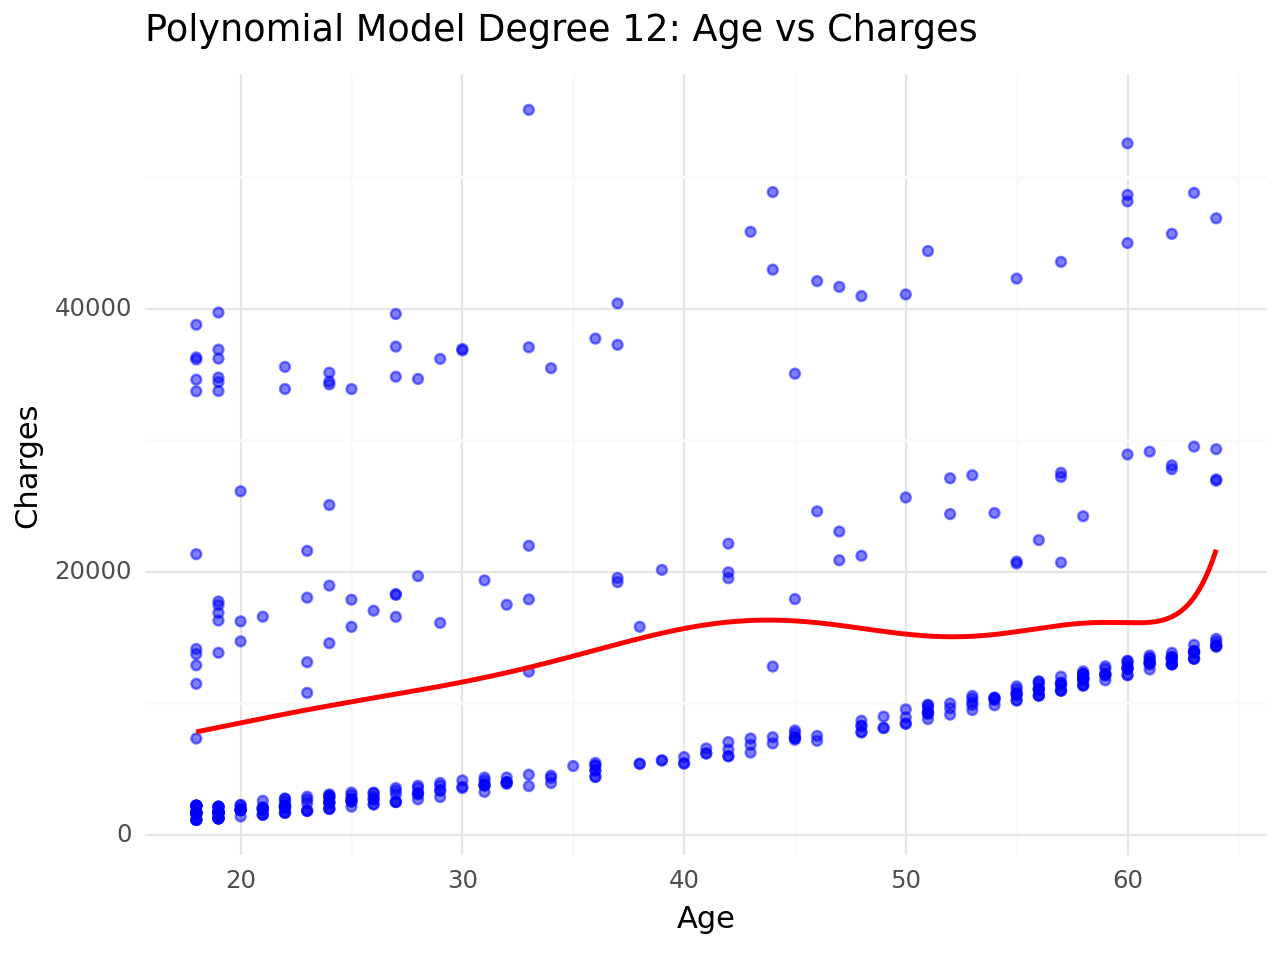

In [171]:
#Predictions plot from Q4
import warnings
warnings.filterwarnings('ignore')

age_range = np.linspace(insurance['age'].min(), insurance['age'].max(), 300).reshape(-1, 1)

age_range_poly = poly12.transform(age_range)

predicted_charges = modelAge12.predict(age_range_poly)

predictions = pd.DataFrame({
    'age': age_range.flatten(),
    'predicted_charges': predicted_charges
})

# Create the plot
Q6plot = (ggplot() 
        + geom_point(data=insurance, mapping=aes(x='age', y='charges'), color='blue', alpha=0.5, size=1.5) 
        + geom_line(data=predictions, mapping=aes(x='age', y='predicted_charges'), color='red', size=1)
        + theme_minimal()
        + labs(title='Polynomial Model Degree 12: Age vs Charges', x='Age', y='Charges')
)


print(Q6plot)


## Predictions Using New Data

In [172]:
#Load in new data

newinsurance = pd.read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Computing_ML\Labs\Lab_5\insurance_costs_2.csv")
#Dummify sex and smoker variables
newinsurance["sex"] = pd.get_dummies(insurance["sex"],drop_first=True)
newinsurance["smoker"] = pd.get_dummies(insurance["smoker"],drop_first=True)
#Convert them to categorical variables
newinsurance['smoker'] = insurance['smoker'].astype('category')
newinsurance['sex'] = insurance['sex'].astype('category')
#Convert to numeric
insurance['smoker'] = pd.to_numeric(insurance['smoker'])
newinsurance['smoker'] = pd.to_numeric(newinsurance['smoker'])

#Create interaction variables
insurance["agesmoke"] = insurance["age"]*insurance["smoker"]
newinsurance["agesmoke"] = newinsurance["age"]*newinsurance["smoker"]
insurance["bmismoke"] = insurance["bmi"]*insurance["smoker"]
newinsurance["bmismoke"] = newinsurance["bmi"]*newinsurance["smoker"]
#Convert back to categorical
insurance['smoker'] = insurance['smoker'].astype('category')
newinsurance['smoker'] = newinsurance['smoker'].astype('category')

In [173]:
# Model 5 Only age as a predictor
X = insurance[['age']]
y = insurance['charges']
X_new = newinsurance[['age']]
y_new = newinsurance["charges"]
#Fit on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model5 = lr.fit(X_train, y_train)
#Predict on new data
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, test_size=0.4, random_state=42)
y5_newpred = model5.predict(X_newtest)
#Calculate MSE
mse5 = mean_squared_error(y_newtest, y5_newpred)
print(f" Model 5 (MSE): {mse5}")

 Model 5 (MSE): 94746480.87657647


In [174]:
# Model 6 age and bmi as predictors
X = insurance[['age','bmi']]
y = insurance['charges']
X_new = newinsurance[['age','bmi']]
y_new = newinsurance["charges"]
#Fit on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model6 = lr.fit(X_train, y_train)
#Predict on new data
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, test_size=0.4, random_state=42)
y6_newpred = model6.predict(X_newtest)
#Calculate MSE
mse6 = mean_squared_error(y_newtest, y6_newpred)
print(f" Model 6 (MSE): {mse6}")

 Model 6 (MSE): 95174913.7624296


In [175]:
# Model 7 age, bmi, and smoker as predictors
X = insurance[['age','bmi','smoker']]
y = insurance['charges']
X_new = newinsurance[['age','bmi','smoker']]
y_new = newinsurance["charges"]
#Fit on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model7 = lr.fit(X_train, y_train)
#Predict on new data
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, test_size=0.4, random_state=42)
y7_newpred = model7.predict(X_newtest)
#Calculate MSE
mse7 = mean_squared_error(y_newtest, y7_newpred)
print(f" Model 7 (MSE): {mse7}")

 Model 7 (MSE): 189548532.1908133


In [176]:
# Model 8 age and bmi, both with smoker interactions as predictors
#Create terms for model
X = insurance[['age','bmi','agesmoke','bmismoke']]
y = insurance['charges']
X_new = newinsurance[['age','bmi','agesmoke','bmismoke']]
y_new = newinsurance["charges"]
#Fit on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model8 = lr.fit(X_train, y_train)
#Predict on new data
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, test_size=0.4, random_state=42)
y8_newpred = model8.predict(X_newtest)
#Calculate MSE
mse8 = mean_squared_error(y_newtest, y8_newpred)
print(f" Model 8 (MSE): {mse8}")

 Model 8 (MSE): 196090466.82520255


In [177]:
# Model 9 age and bmi and smoker, both quantitative interactions with smoker as predictors
#Create terms for model
X = insurance[['age','bmi','agesmoke','bmismoke','smoker']]
y = insurance['charges']
X_new = newinsurance[['age','bmi','agesmoke','bmismoke','smoker']]
y_new = newinsurance["charges"]
#Fit on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model9 = lr.fit(X_train, y_train)
#Predict on new data
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, test_size=0.4, random_state=42)
y9_newpred = model9.predict(X_newtest)
#Calculate MSE
mse9 = mean_squared_error(y_newtest, y9_newpred)
print(f" Model 9 (MSE): {mse9}")


 Model 9 (MSE): 195683748.9647576


The best model to use out of all the models using the new data for predictions was model 5 (only age as predictor) with an MSE of 94746480. This is interesting as it shows the new data has different relationships with the other predictor variables than the original dataset. For example, the smoker variable was a very strong predictor of charges in the original dataset, although with the new dataset the model without smoker outperformed all the models with smoker included. (interaction/no interaction) This teaches a valuable lesson about prediction expectations on new datasets using models trained on other data.

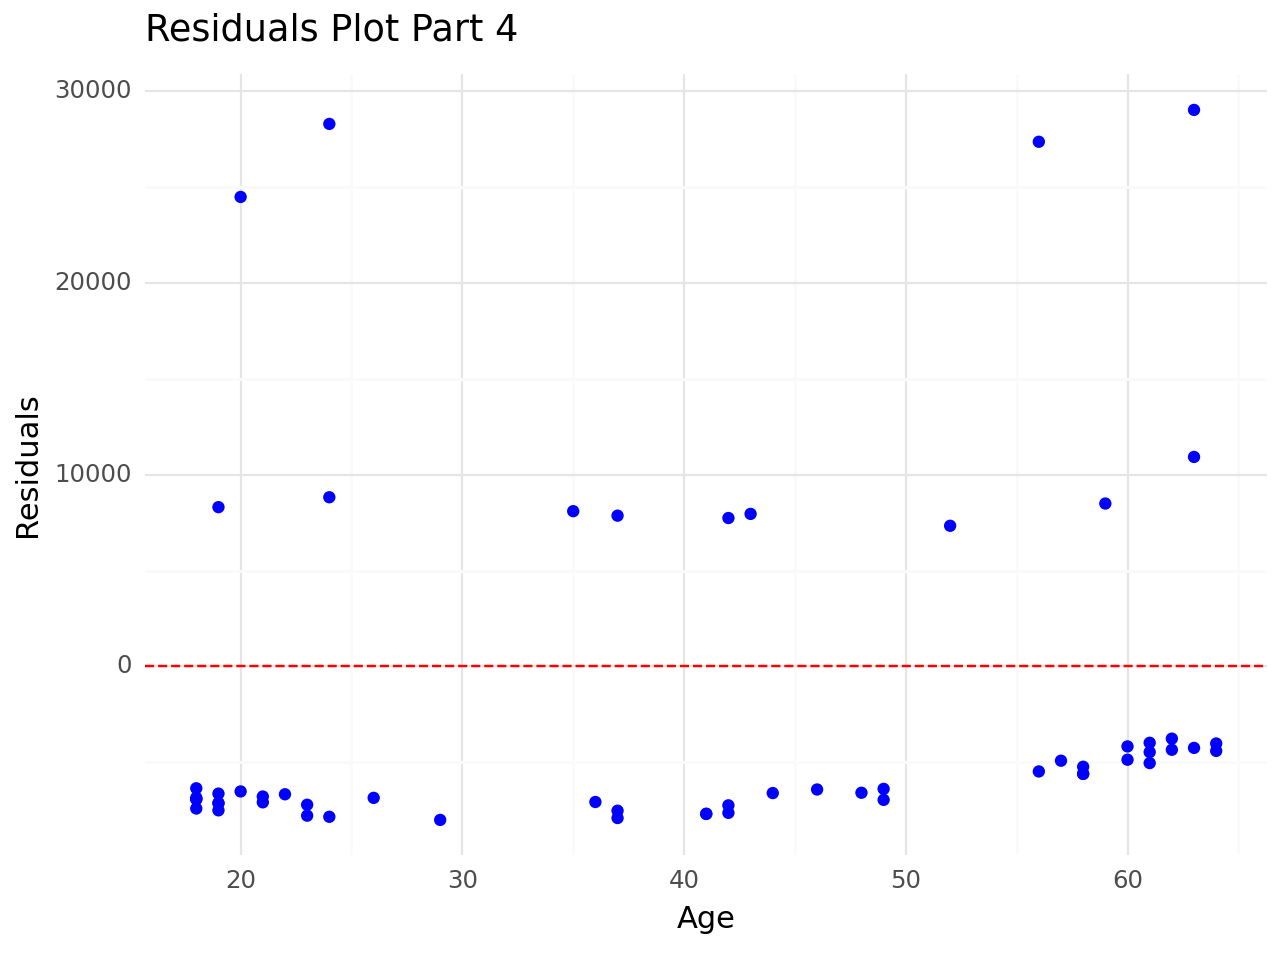

In [231]:
#Residual Plot

# Calculate residuals
residuals = y_newtest - y5_newpred

# Create df for plot
residuals_df = pd.DataFrame({
    'Age': X_newtest['age'],
    'Residuals': residuals
})


residual_plot = (ggplot(residuals_df, aes(x='Age', y='Residuals'))
                 + geom_point(color='blue')  
                 + geom_hline(yintercept=0, color='red', linetype='dashed')  
                 + labs(title='Residuals Plot Part 4', x='Age', y='Residuals')
                 + theme_minimal()
)

print(residual_plot)


## Full Exploration: Creating the Best Model

In [218]:
#Prepare Data for Best model
#Create interaction variables
insurance["agebmi"] = insurance["age"]*insurance["bmi"]
newinsurance["agebmi"] = newinsurance["age"]*newinsurance["bmi"]

In [230]:
#Find Best Model
#Create terms for model
X = insurance[['age','agebmi']]
y = insurance['charges']
X_new = newinsurance[['age','agebmi']]
y_new = newinsurance["charges"]
#Fit on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
modelBest = lr.fit(X_train, y_train)
#Predict on new data
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, test_size=0.4, random_state=42)
yBest_newpred = modelBest.predict(X_newtest)
#Calculate MSE
mseBest = mean_squared_error(y_newtest, yBest_newpred)
print(f" Best Model (MSE): {mseBest}")
r2Best = r2_score(y_newtest, yBest_newpred)
print(f"Best Model (R2): {r2Best}")

 Best Model (MSE): 93925235.0858588
Best Model (R2): 0.16780810942094626


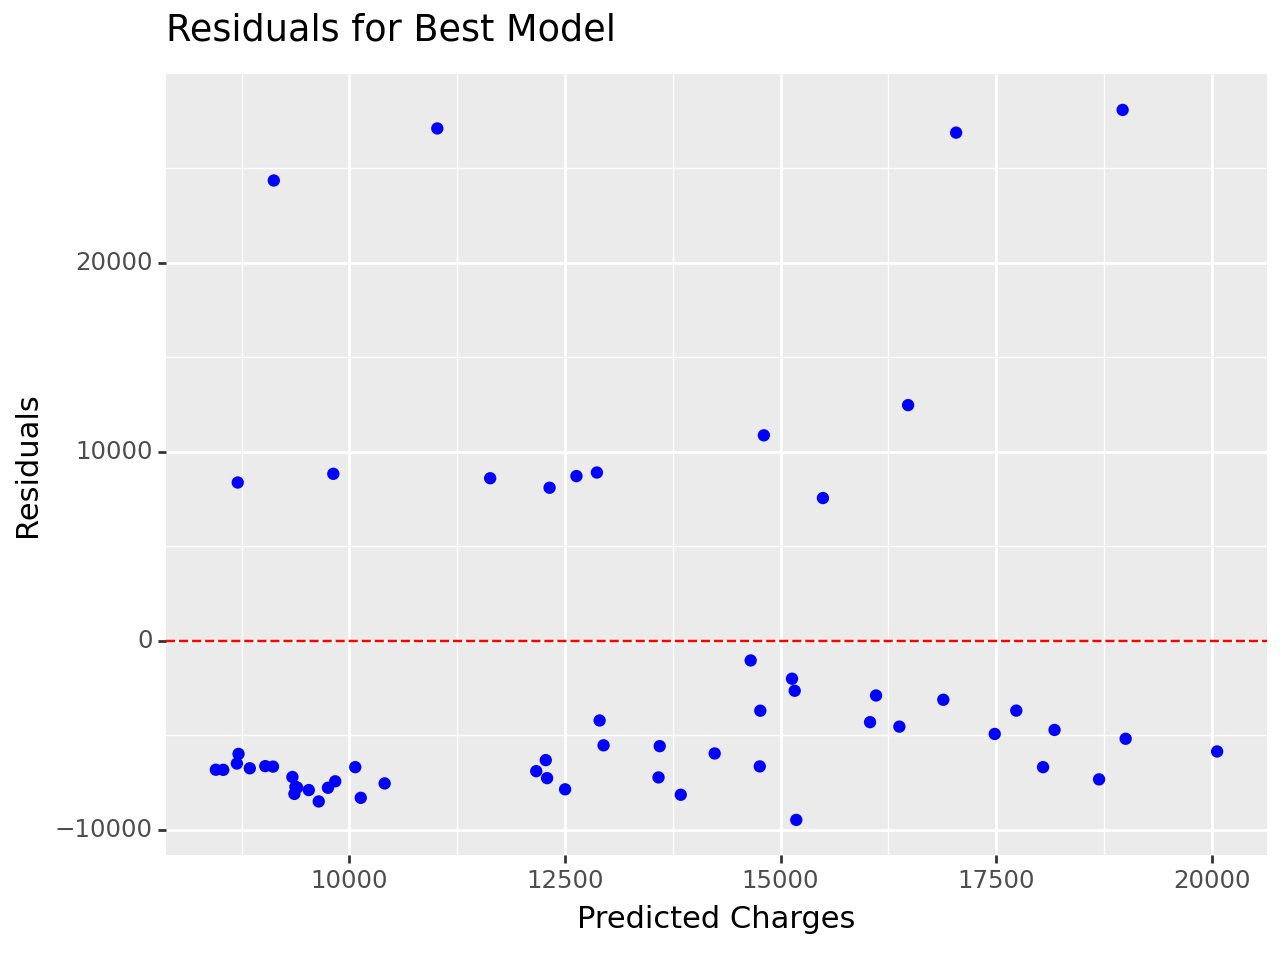

<Figure Size: (640 x 480)>

In [233]:
# Calculate residuals 
residuals_new = y_newtest - yBest_newpred

# Create df for plot
residuals_df_new = pd.DataFrame({
    'Predicted': yBest_newpred,
    'Residuals': residuals_new
})

(ggplot(residuals_df_new, aes(x='Predicted', y='Residuals')) 
     + geom_point(color='blue') 
     + geom_hline(yintercept=0, color='red', linetype='dashed') 
     + labs(x='Predicted Charges', y='Residuals', title='Residuals for Best Model')  
)


Due to the charges having a strong relationship with the smoker variable in the original dataset, and a weak relationship in the new dataset, the smoker variable was left out. This was the best model I could find after trial and error with other polynomial models and/or variables. The graph below also gives insight as to why it was hard create a good predictor model for the new data, based on the old.

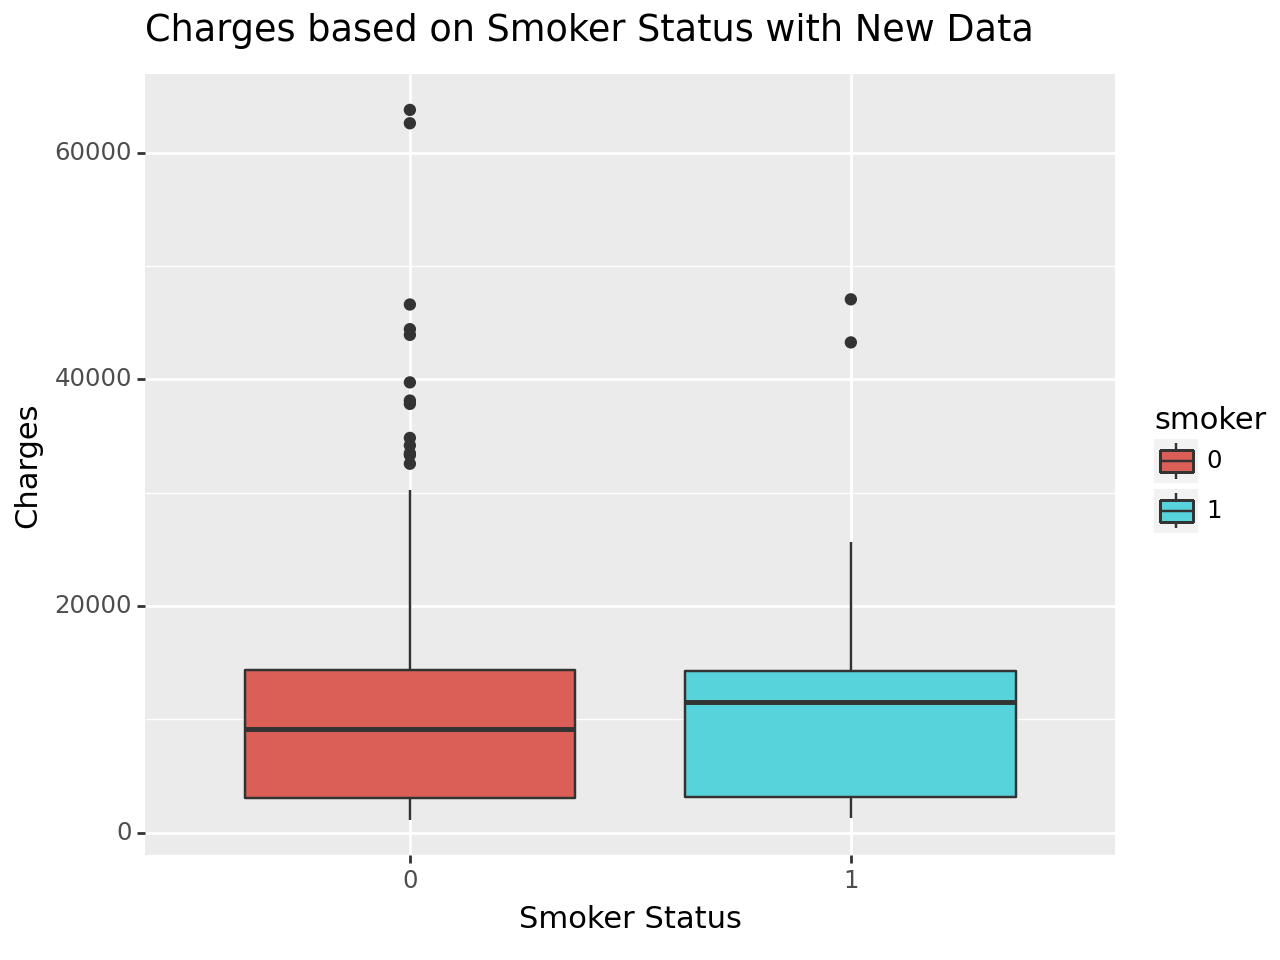

In [262]:
# New Data relationship w/smoker
newplot3 = (
    ggplot(newinsurance, aes(x='smoker', y='charges', fill='smoker')) 
    + geom_boxplot() 
    + labs(title="Charges based on Smoker Status with New Data", x="Smoker Status", y="Charges")
)

print(newplot3)